In [185]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
#ADD YOUR DIRECTORY HERE
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/utils')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/models')

from utils.analysis import *
from utils.getters import * 
from utils.plotters import * 
from utils.helpers import * 
from models_config.model_config_GSP import *


import matplotlib.pyplot as plt

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {
    'text.usetex' : True,
    'font.size' : 11,
    'font.family' :'lmodern'
}
plt.rcParams.update(params)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/1j/5s36wz6s0jlb1k64vsq1k2zh0000gn/T/ipykernel_47994/3688614129.py:20: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


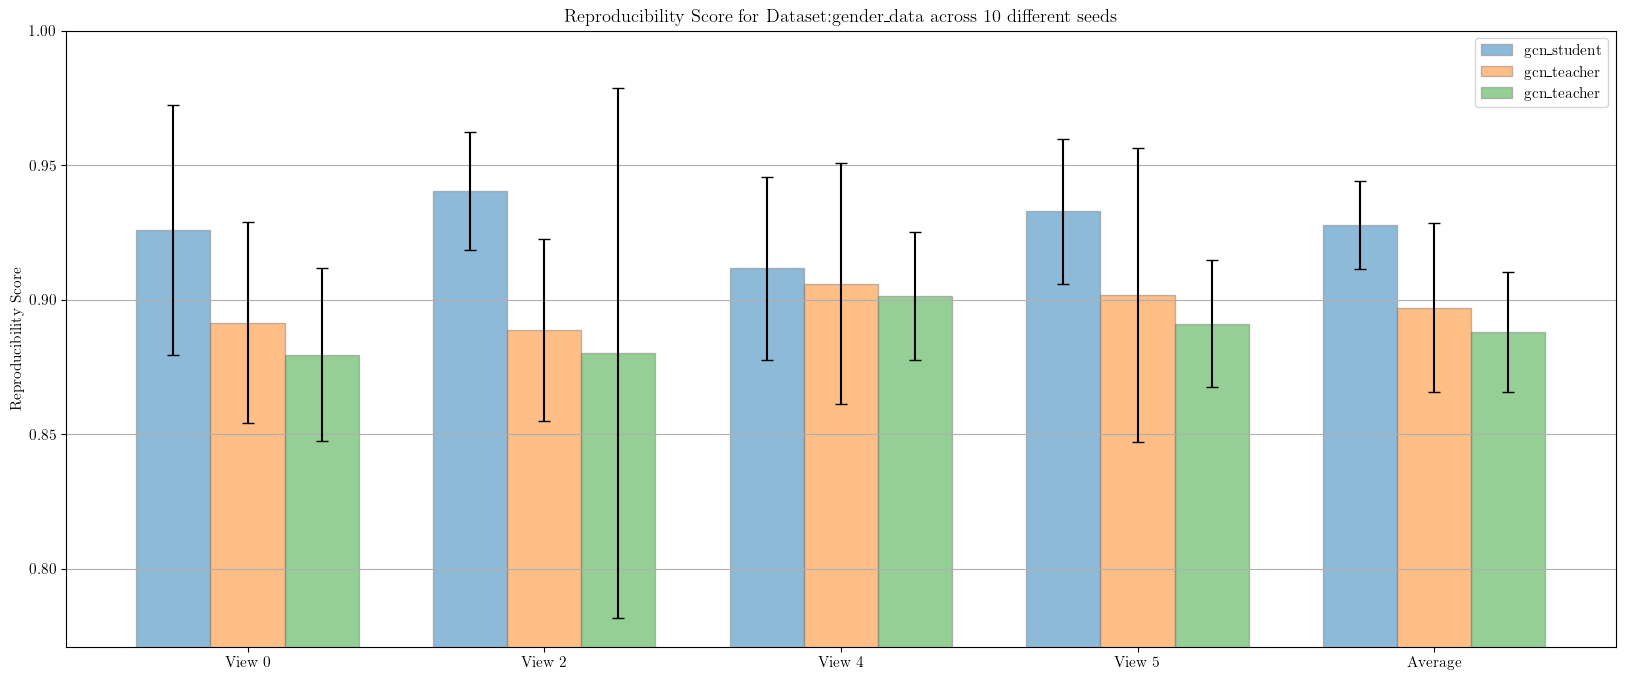

<Figure size 2000x800 with 0 Axes>

In [3]:
dataset="gender_data"
views=[0, 2, 4, 5]
models=["gcn_student", "gcn", "gcn"]
model_args = [gcn_student_args, gcn_args, gcn_3_args]
CV=["3Fold", "5Fold", "10Fold"]
runs=[i for i in range(10)]
save_fig=False

plot_bar_chart_reproducibility_mulitple_runs(dataset, views, models, CV, runs, students=[-1,-1,-1], model_args=model_args, save_fig=False)

In [180]:
# PLOTTING RESULTS GCN-GCN ALL DATASETS
Teacher = [89.138889, 88.875, 90.597222, 90.166667, 89.208333, 89.5972222]
Teacher = [i/100 for i in Teacher]

Student	= [92.597222, 94.041667, 91.166667, 93.291667, 97.694444, 93.7583334]
Student = [i/100 for i in Student]

Vanilla = [90.069444, 92.847222, 90.569444, 92.583333, 96.541667, 92.522222]
Vanilla = [i/100 for i in Vanilla]

FitNet  = [63.5, 70.277778, 67.861111, 73.930556, 92.763889, 73.6666668]
FitNet = [i/100 for i in FitNet]

LSP     = [70.486111, 77.305556, 74.402778, 77.916667, 91.5, 78.3222224]
LSP = [i/100 for i in LSP]

MSKD    = [82.444444, 81.847222, 78.611111, 79.458333, 90.638889, 82.5999998]
MSKD = [i/100 for i in MSKD]

delta_Vanilla = [str(round(-(Student[i]-Vanilla[i])/Student[i]*100,2))+"\%" for i in range(6)]
delta_FitNet = [str(round(-(Student[i]-FitNet[i])/Student[i]*100,2))+"\%" for i in range(6)]
delta_LSP = [str(round(-(Student[i]-LSP[i])/Student[i]*100,2))+"\%" for i in range(6)]
delta_MSKD = [str(round(-(Student[i]-MSKD[i])/Student[i]*100,2))+"\%" for i in range(6)]
delta = [delta_Vanilla, delta_FitNet, delta_LSP, delta_MSKD]

/var/folders/1j/5s36wz6s0jlb1k64vsq1k2zh0000gn/T/ipykernel_47994/616725936.py:2: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


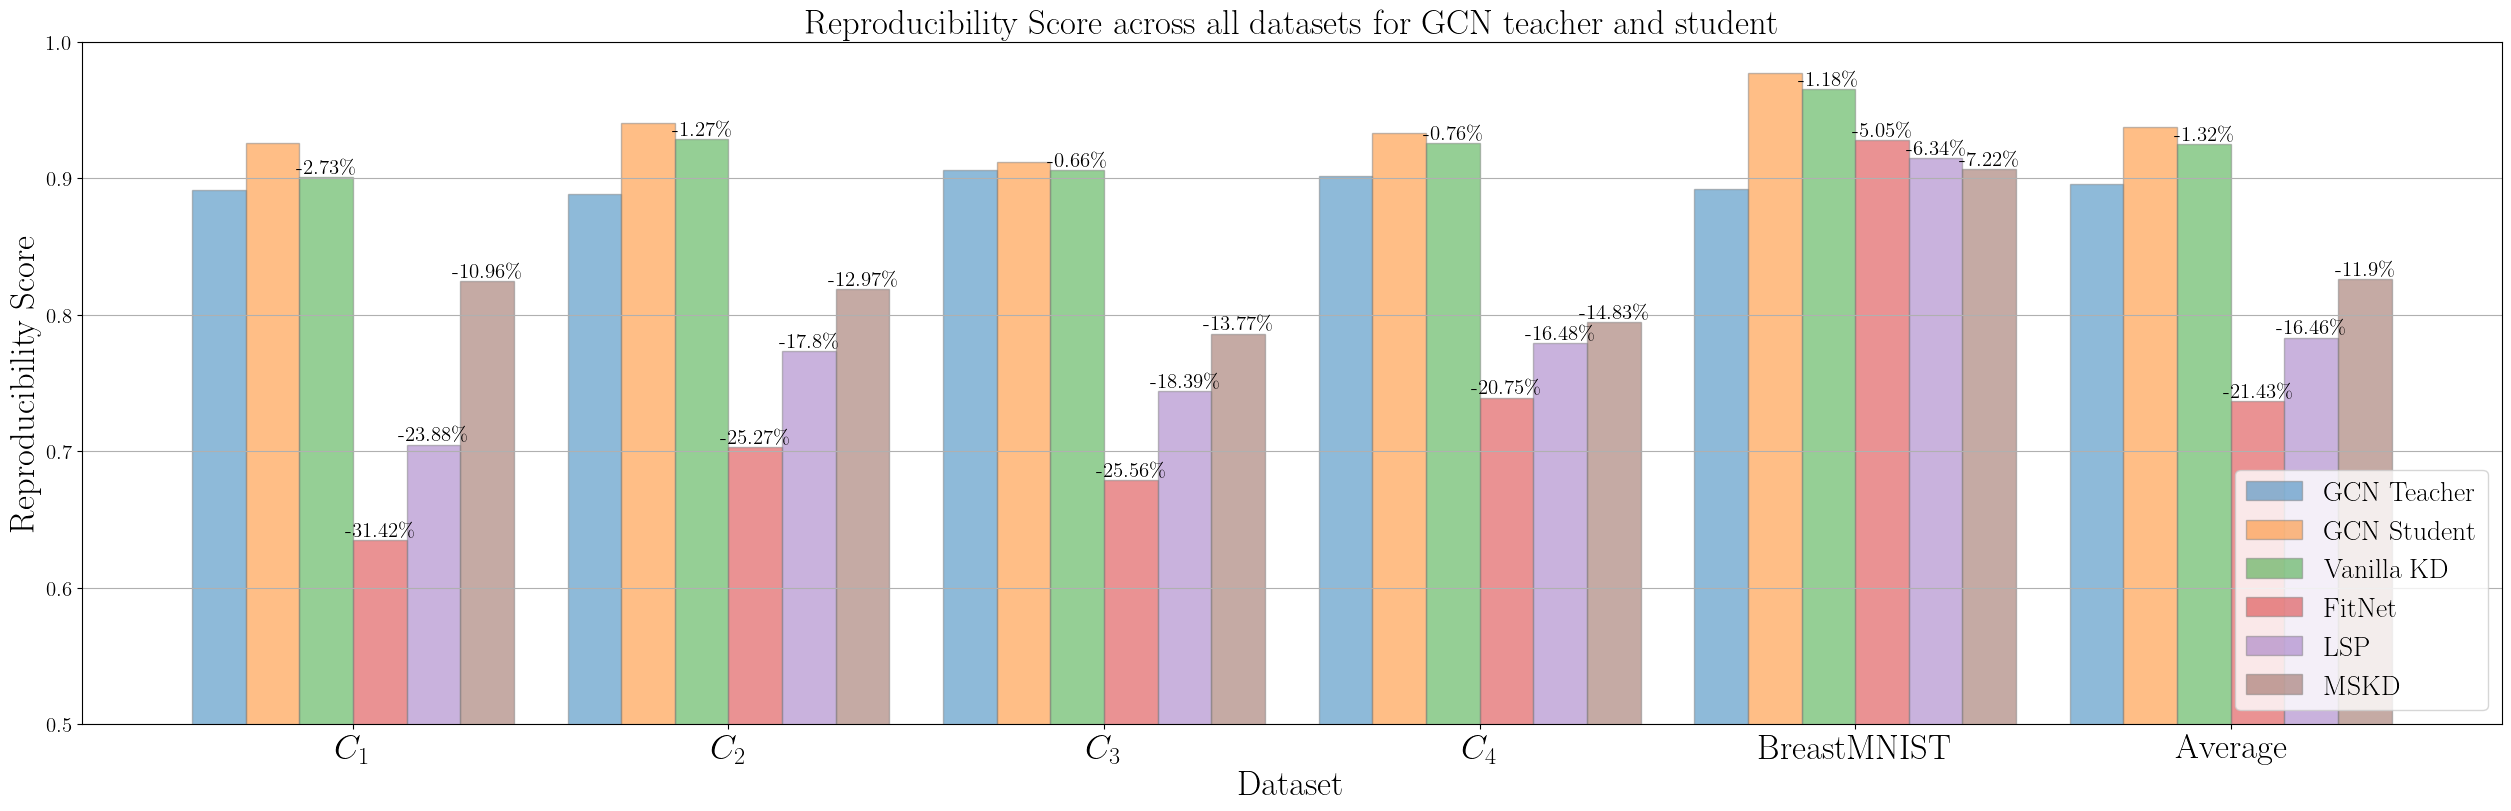

In [181]:
#GET MEAN AND STD ACROSS MEAN OF RUNS
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {
    'text.usetex' : True,
    'font.size' : 15,
    'font.family' :'lmodern'
}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (25,8)


fig, ax = plt.subplots(layout='constrained')
mean_all_runs = [Teacher, Student, Vanilla, FitNet, LSP, MSKD]
barWidth = 1/(len(mean_all_runs)+1)
X = np.arange(6)
sep = 0.00
label = ["GCN Teacher", "GCN Student", "Vanilla KD", "FitNet", "LSP", "MSKD"]

for i, data in enumerate(mean_all_runs):
    rects = ax.bar(X + sep, data, width = barWidth, edgecolor ='grey', alpha=0.5, label=label[i])
    if i>=2:
        ax.bar_label(rects, delta[i-2])
    sep += (barWidth)

x_ticks = ["$C_1$", "$C_2$", "$C_3$", "$C_4$", "BreastMNIST", "Average"]
ax.set_xticks([r + barWidth + barWidth + barWidth * 0.5 for r in range(len(mean_all_runs[0]))])
ax.set_xticklabels(x_ticks, fontsize=25)
ax.set_ylim(.50, 1)
ax.set_ylabel("Reproducibility Score", fontsize=25)
ax.set_xlabel("Dataset", fontsize=25)
ax.legend(loc='lower right', prop={'size': 20})
ax.grid(axis = 'y')
ax.set_title("Reproducibility Score across all datasets for GCN teacher and student", fontsize=25)
plt.savefig('Reproducibility Score GCN to GCN.pdf', format='pdf')

In [182]:
# PLOTTING RESULTS GAT-GAT ALL DATASETS
Teacher = [91.722222, 93.333333, 91.597222, 92.416667, 73.361111, 88.486111]
Teacher = [i/100 for i in Teacher]

Student	= [91.944444, 90.736111, 91.986111, 91.75, 99.472222, 93.1777776]
Student = [i/100 for i in Student]

Vanilla = [90.805556, 90.277778, 90.055556, 91.208333, 97.111111, 91.8916668]
Vanilla = [i/100 for i in Vanilla]

FitNet  = [78, 84.125, 74.486111, 85.222222, 88.541667, 82.075]
FitNet = [i/100 for i in FitNet]

LSP     = [88.986111, 85.763889, 82.208333, 85.111111, 91.597222, 86.7333332]
LSP = [i/100 for i in LSP]

MSKD    = [88.097222, 84.472222, 81.972222, 85.444444, 91.041667, 86.2055554]
MSKD = [i/100 for i in MSKD]

delta_Vanilla = [str(round(-(Student[i]-Vanilla[i])/Student[i]*100,2))+"\%" for i in range(6)]
delta_FitNet = [str(round(-(Student[i]-FitNet[i])/Student[i]*100,2))+"\%" for i in range(6)]
delta_LSP = [str(round(-(Student[i]-LSP[i])/Student[i]*100,2))+"\%" for i in range(6)]
delta_MSKD = [str(round(-(Student[i]-MSKD[i])/Student[i]*100,2))+"\%" for i in range(6)]
delta = [delta_Vanilla, delta_FitNet, delta_LSP, delta_MSKD]

/var/folders/1j/5s36wz6s0jlb1k64vsq1k2zh0000gn/T/ipykernel_47994/3909892880.py:2: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


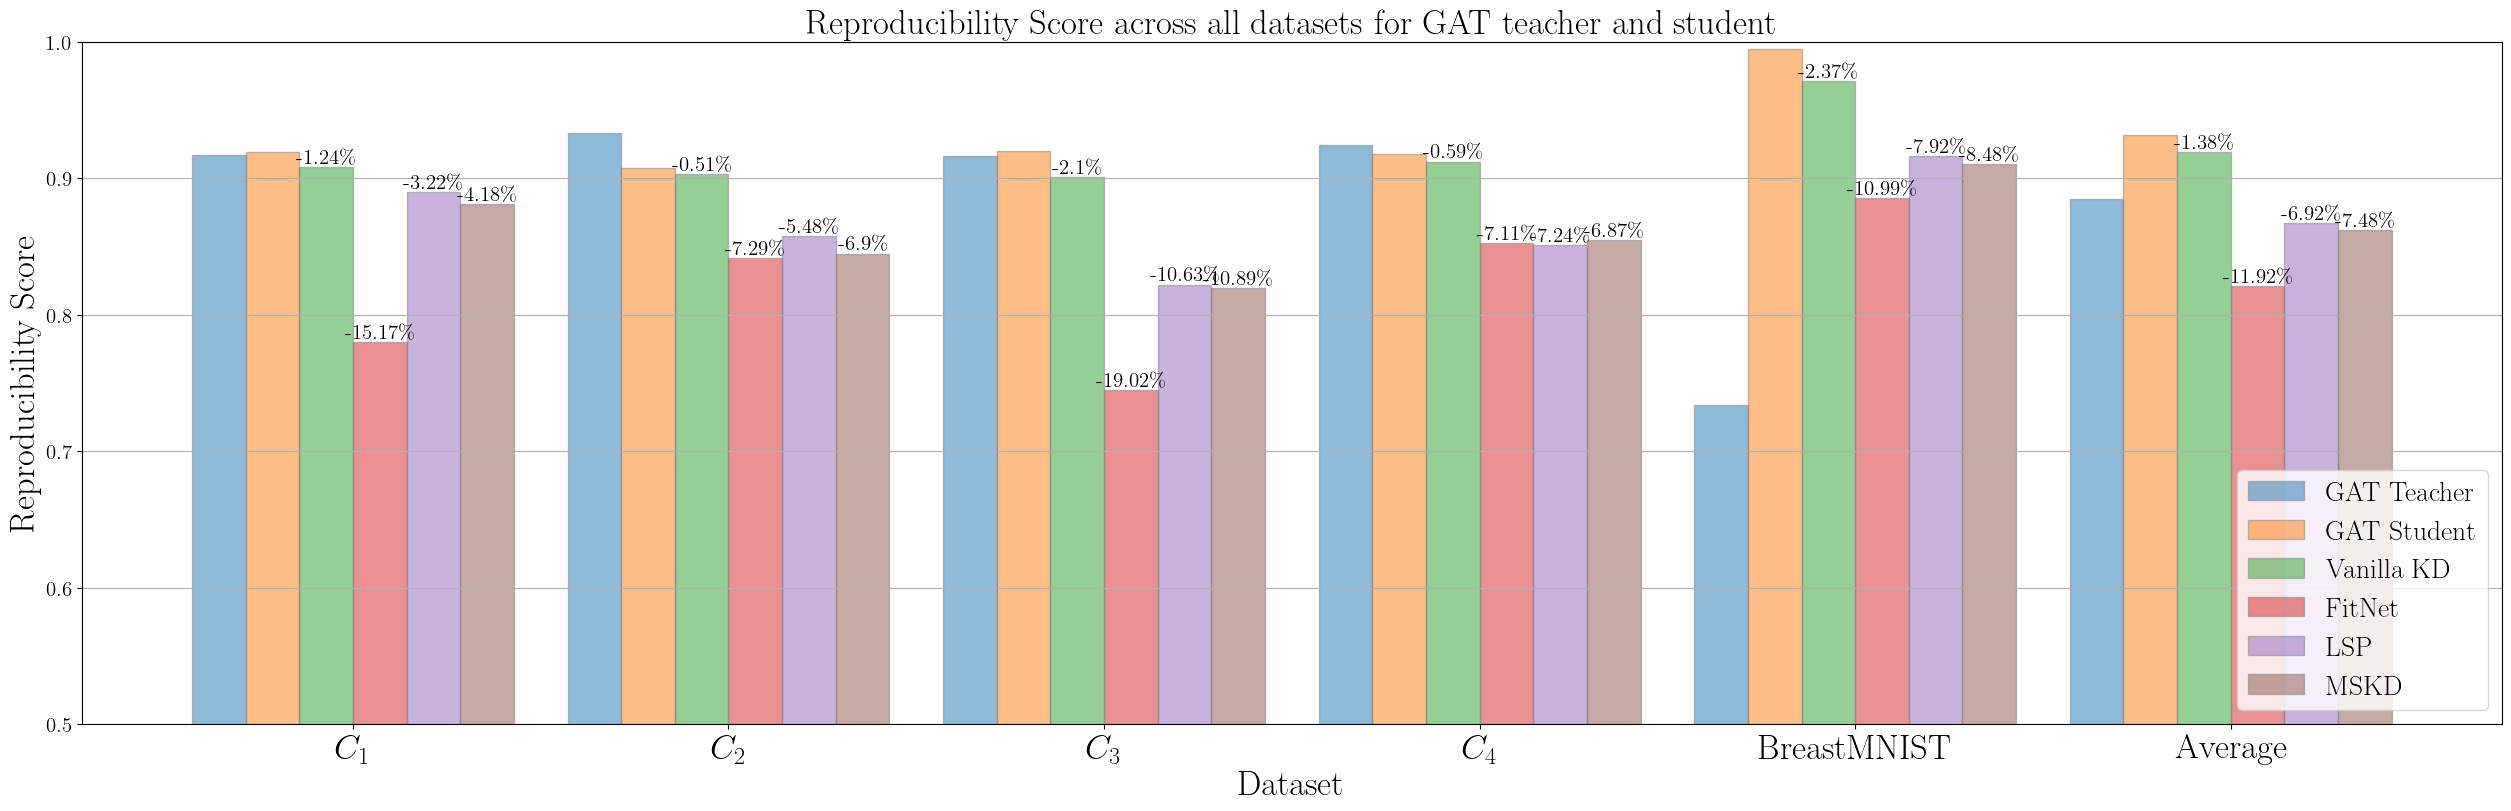

In [183]:
#GET MEAN AND STD ACROSS MEAN OF RUNS
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {
    'text.usetex' : True,
    'font.size' : 15,
    'font.family' :'lmodern'
}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (25,8)


fig, ax = plt.subplots(layout='constrained')
mean_all_runs = [Teacher, Student, Vanilla, FitNet, LSP, MSKD]
barWidth = 1/(len(mean_all_runs)+1)
X = np.arange(6)
sep = 0.00
label = ["GAT Teacher", "GAT Student", "Vanilla KD", "FitNet", "LSP", "MSKD"]

for i, data in enumerate(mean_all_runs):
    rects = ax.bar(X + sep, data, width = barWidth, edgecolor ='grey', alpha=0.5, label=label[i])
    if i>=2:
        ax.bar_label(rects, delta[i-2])
    sep += (barWidth)

x_ticks = ["$C_1$", "$C_2$", "$C_3$", "$C_4$", "BreastMNIST", "Average"]
ax.set_xticks([r + barWidth + barWidth + barWidth * 0.5 for r in range(len(mean_all_runs[0]))])
ax.set_xticklabels(x_ticks, fontsize=25)
ax.set_ylim(.50, 1)
ax.set_ylabel("Reproducibility Score", fontsize=25)
ax.set_xlabel("Dataset", fontsize=25)
ax.legend(loc='lower right', prop={'size': 20})
ax.grid(axis = 'y')
ax.set_title("Reproducibility Score across all datasets for GAT teacher and student", fontsize=25)
plt.savefig('Reproducibility Score GAT to GAT.pdf', format='pdf')

In [184]:
def get_student_model_metric(dataset, model, CV, runs, analysis_type, dataset_split, view, model_args):
    #Get average student modele metrics across all runs and all cv for all models in ensemble 
    #EACH FOLD INDIVIDUAL

    student_data_mean = [] 
    student_data_var = [] 
    
    for student in range(model_args["n_students"]):

        run_data = []   

        for run in runs:

            model_metrics = []
            
            for training_type in CV:

                model_cv_metrics = get_mean_CV_metric_student_model(
                    dataset=dataset, 
                    model=model, 
                    analysis_type=analysis_type, 
                    training_type=training_type, 
                    view=view, 
                    run=run, 
                    student=student, 
                    dataset_split=dataset_split,
                    model_args=model_args
                    )
                model_metrics.append(model_cv_metrics)
            
            run_data.append(model_metrics)
        
        student_data_mean.append(np.mean(run_data, axis=0))   
        student_data_var.append(np.std(run_data, axis=0))        

    return student_data_mean, student_data_var

In [ ]:
def get_student_model_metric(dataset, model, CV, runs, analysis_type, dataset_split, view, model_args):
    #Get average student modele metrics across all runs and all cv for all models in ensemble 
    #EACH FOLD INDIVIDUAL

    student_data_mean = [] 
    student_data_var = [] 
    
    for student in range(model_args["n_students"]):

        run_data = []   

        for run in runs:

            model_metrics = []
            
            for training_type in CV:

                model_cv_metrics = get_mean_CV_metric_student_model(
                    dataset=dataset, 
                    model=model, 
                    analysis_type=analysis_type, 
                    training_type=training_type, 
                    view=view, 
                    run=run, 
                    student=student, 
                    dataset_split=dataset_split,
                    model_args=model_args
                    )
                model_metrics.append(model_cv_metrics)
            
            run_data.append(model_metrics)
        
        student_data_mean.append(np.mean(run_data, axis=0))   
        student_data_var.append(np.std(run_data, axis=0))        

    return student_data_mean, student_data_var

## Accuracy

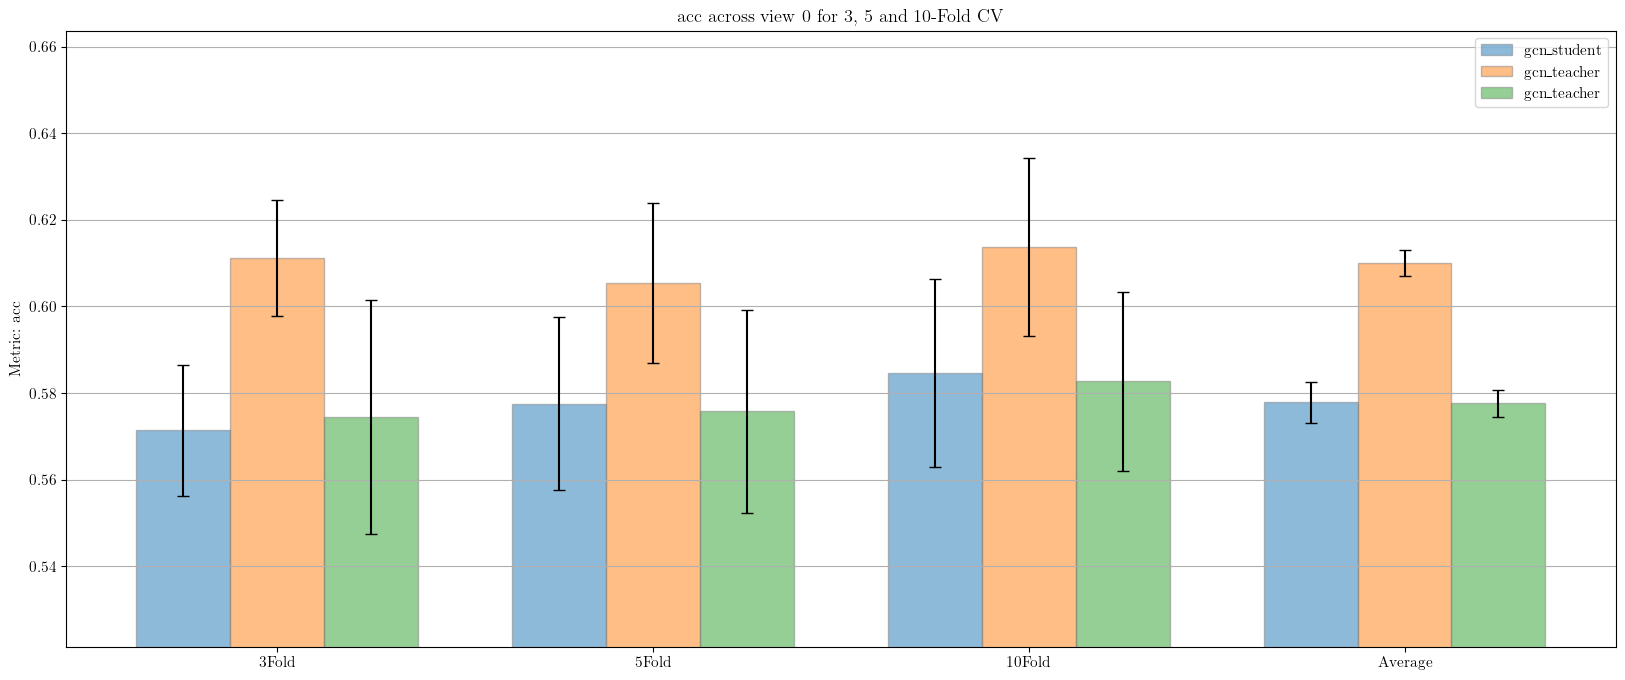

<Figure size 2000x800 with 0 Axes>

In [4]:
plot_bar_chart_metric_multiple_runs(dataset="gender_data", view=0, 
                                    models=["gcn_student", "gcn", "gcn"],
                                    CV=["3Fold", "5Fold", "10Fold"], 
                                    runs=[i for i in range(10)], 
                                    metric="acc", 
                                    dataset_split="val", 
                                    analysis_type="model_assessment", 
                                    model_args=[gcn_student_args, gcn_args, gcn_3_args], 
                                    save_fig=False)


## Model Size 

In [8]:
model_1_dir = '/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/model_data/gender_data/gcn/model_assessment/gcn_student/models/gcn_student_MainModel_3Fold_gender_data_gcn_student_run_0_fixed_init_CV_0_view_0.pt'
model_2_dir = '/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/model_data/gender_data/gcn/model_assessment/gcn/models/gcn_MainModel_3Fold_gender_data_gcn_run_0_fixed_init_CV_0_view_0.pt'
model_3_dir = '/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/model_data/gender_data/gcn/model_assessment/gcn/models/gcn_MainModel_3Fold_gender_data_gcn_run_0_fixed_init_layers_3_CV_0_view_0.pt'

model_layer_1 = torch.load(model_1_dir)
model_layer_2 = torch.load(model_2_dir)
model_layer_3 = torch.load(model_3_dir)

In [10]:
model_layer_1


GCN_STUDENT(
  (gc1): GraphConvolution (35 -> 2)
  (LinearLayer): Linear(in_features=35, out_features=1, bias=True)
)

In [7]:
model_1_dir = '/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/model_data/gender_data/gat/model_assessment/gat_student/models/gat_student_MainModel_3Fold_gender_data_gat_student_run_0_fixed_init_CV_0_view_0_with_teacher.pt'
model_layer_1 = torch.load(model_1_dir)
model_layer_1

GAT_STUDENT(
  (out_att): GraphAttentionLayer (35 -> 2)
  (LinearLayer): Linear(in_features=35, out_features=1, bias=True)
)

In [6]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(model_layer_1), count_parameters(model_layer_2), count_parameters(model_layer_3)

(110, 2470, 6630)

In [7]:
def percentage_decrease(original_value, new_value):
    decrease = original_value - new_value
    percentage = (decrease / original_value) * 100
    return percentage

percentage_decrease(2470, 108)

95.62753036437248

In [ ]:
model_1_dir = '/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/model_data/gender_data/gcn/model_assessment/gcn_student/models/gcn_student_MainModel_3Fold_gender_data_gcn_student_run_0_fixed_init_CV_0_view_0.pt'
model_2_dir = '/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/model_data/gender_data/gcn/model_assessment/gcn/models/gcn_MainModel_3Fold_gender_data_gcn_run_0_fixed_init_CV_0_view_0.pt'

model_layer_1 = torch.load(model_1_dir)
model_layer_2 = torch.load(model_2_dir)

## Inference time 

In [8]:
import time
from torch.autograd import Variable

def inference_time(model):
    
    model.eval()
    
    G_list = load_data("gender_data", 0, NormalizeInputGraphs=False)

    folds = stratify_splits(G_list, 3)
        
    [random.shuffle(folds[i]) for i in range(len(folds))]
    train_set, validation_set, test_set = datasets_splits(folds, model_args, 0)
    train_dataset, val_dataset, threshold_value = model_assessment_split(train_set, validation_set, test_set, gcn_student_args)

    for batch_idx, data in enumerate(train_dataset):

        adj = Variable(data['adj'].float(), requires_grad=False).to(device)
        adj = torch.squeeze(adj)

        features = np.identity(adj.shape[0])
        features = Variable(torch.from_numpy(features).float(), requires_grad=False).to("cpu")
        if gcn_student_args["threshold"] in ["median", "mean"]:
            adj = torch.where(adj > threshold_value, torch.tensor([1.0]).to("cpu"), torch.tensor([0.0]).to("cpu"))

        begin_time = time.time()

        model(features, adj)

        return time.time() - begin_time


In [9]:
inference_time(model_layer_1), inference_time(model_layer_2), inference_time(model_layer_3)

Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232


(0.012597084045410156, 0.0018568038940429688, 0.0005660057067871094)

# MOTIVATION FOR REPRODUCIBLE KDG

In [10]:
def reproducibility_mulitple_runs_values(dataset, views, models, CV, runs, students=[-1,-1,-1], model_args=model_args, save_fig=False):  
    
    mean_all_runs = []
    
    for run in runs:
        view_data_mean, _ = view_reproducibility_analysis(dataset, models, CV, views, run, students, model_args)
        mean_all_runs.append(view_data_mean)

    mean_all_std = np.std(mean_all_runs, axis=0)
    mean_all_runs = np.mean(mean_all_runs, axis=0)

    return mean_all_runs, mean_all_std

In [11]:
mean_all_runs, mean_all_std = reproducibility_mulitple_runs_values(dataset, views, models, CV, runs, students=[-1,-1,-1], model_args=model_args, save_fig=False)

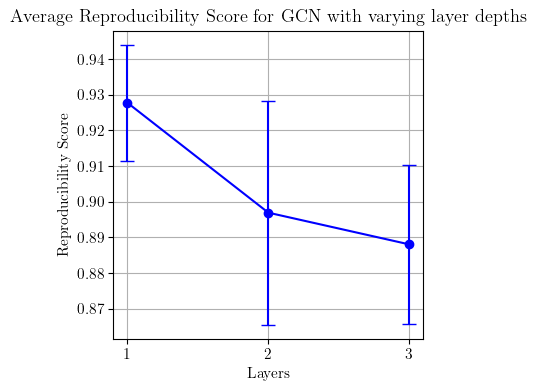

In [45]:
plt.rcParams["figure.figsize"] = (4,4)
layers = [1,2,3]
# Sample data
x = layers
y = mean_all_runs.T[-1]
std = mean_all_std.T[-1]

# Plotting
plt.plot(x, y, color='b')
plt.errorbar(x, y, yerr=std, fmt='o', capsize=5, color='b')
plt.xticks(x, x)

# Customize the plot
plt.xlabel('Layers')
plt.ylabel('Reproducibility Score')
plt.title('Average Reproducibility Score for GCN with varying layer depths')

# Display the plot
plt.grid()
plt.show()

In [17]:
inference_time_1 = [inference_time(model_layer_1) for i in range(10)]
inference_time_2 = [inference_time(model_layer_2) for i in range(10)]
inference_time_3 = [inference_time(model_layer_3) for i in range(10)]

Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232
Num training graphs:  466 ; Num test graphs:  232


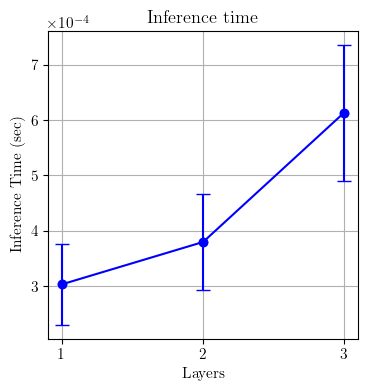

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (4,4)

# Sample data
x = layers
y = [np.mean(inference_time_1),np.mean(inference_time_2),np.mean(inference_time_3)]
# Plotting
plt.plot(x, y, color='b')
plt.errorbar(x, y, yerr=[np.std(inference_time_1),np.std(inference_time_2),np.std(inference_time_3)], fmt='o', capsize=5, label='Standard Deviation', color='b')
plt.scatter(x, y)
plt.xticks(x, x)

# Customize the plot
plt.xlabel('Layers')
plt.ylabel('Inference Time (sec)')
plt.title('Inference time')
plt.grid()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

#plt.legend()

# Display the plot
plt.show()